# Naive Bayes para polaridad

En este cuaderno estan algunos modelos para la polaridad algunos bayesianos y no bayesianos , la mayoria con bigramas
   *  Naive Bayes multinomial
   * Naive Bayes Bernoulli
   * Naive Bayes Gaussiano 
   * Naive Bayes multinomial corregido
   
No bayesianos

   * TF-IDF (Term Frequency-Inverse Document Frequency)
   * SVM lineal
   * Stochastic gradient descent 
   

Fuente de https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb

que es el gradiente descendiente https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/#Las_matematicas_del_Gradiente_Descendiente

In [4]:
!pip install sqlalchemy
!pip install psycopg2
!pip install pygresql

In [3]:
#librerias 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#from tensorflow import keras
from numpy import array
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
#from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score # para dividir la muestra en validacion y test

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer# Create feature vectors

Conexion de la BD al servidor

In [5]:
# IMPORTANDO LOS DATOS arreglados
data=pd.read_csv('/home/denislopez/KL/SEM2_12021/nlp/Vacunas/Noambiguos_vacunas.csv', header=0)

#data=data.drop(['Unnamed: 0'], index=1)
data=data.iloc[:,8:10]
print(data.head(5))

                                               texto  polaridad
0  malo queremos gasolina de 10 el litro malo har...          2
1  falta de vacunas en sabino genera molestia muc...          3
2               sin vacunas no regresaremos a clases          3
3  premio nobel de la paz 2021 para brigada medic...          2
4  por qué no vacunar uruguayos por el mundo por ...          3


In [6]:
reemplaza= {3.0: "NEGATIVE", 2.0: "NEUTRAL",1.0: "POSITIVE"}
data.polaridad=data.polaridad.replace(reemplaza)
data.head()

,texto,polaridad
0,malo queremos gasolina de 10 el litro malo har...,NEUTRAL
1,falta de vacunas en sabino genera molestia muc...,NEGATIVE
2,sin vacunas no regresaremos a clases,NEGATIVE
3,premio nobel de la paz 2021 para brigada medic...,NEUTRAL
4,por qué no vacunar uruguayos por el mundo por ...,NEGATIVE


In [7]:
data_sin_negativo=data[data['polaridad']!="NEGATIVE"]
len(data_sin_negativo)

99

In [8]:
data['polaridad'].value_counts()

NEGATIVE    287
NEUTRAL      57
POSITIVE     42
Name: polaridad, dtype: int64

Dvidamos los datos en un 70% de entrenamiento y un 30% para validacion

In [9]:

x_train, x_test, y_train, y_test = train_test_split(
     data.texto, data.polaridad, test_size=0.3, shuffle=False, random_state=1010)


vectorizacion de las palabras con el metodo Tf-idi gual que en SVM pero esta vez utilizando un bigrama 

In [10]:
vectorizer = TfidfVectorizer(min_df = 0.001,
                             max_df = 0.9,
                             sublinear_tf = True,
                             use_idf = True,
                            stop_words={'spanish'},
                             ngram_range=(2,2))
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [11]:
# Word2vec
import gensim

/home/denislopez/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## NB multinomial (Naive Bayes multinomial)

In [12]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=0.2)
MNB.fit(train_vectors, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [13]:

predicted = MNB.predict(test_vectors)
accuracy_score_mnb = metrics.accuracy_score(predicted, y_test)
print("acc:",accuracy_score_mnb*100,"%")

acc: 74.13793103448276 %


veamos un ejemplo de prediccion 

In [14]:

#review_vector = vectorizer.transform(['@Avianca es de las peores aerolineas, nunca responden por los tiquetes, es decepcionante']) # vectorizing
frase1=['las vacuna que me pusieron fue mala dio dolor de cabeza']
frase2=['estoy contenta por mi vacuna']
vector_frase1 = vectorizer.transform(frase1) # vectorizing
vector_frase2 = vectorizer.transform(frase2)
print('casificacodr Naive Bayes Multinomial de frase 1',MNB.predict(vector_frase1))
print('casificacodr Naive Bayes Multinomial de frase 1',MNB.predict(vector_frase2))


casificacodr Naive Bayes Multinomial de frase 1 ['NEGATIVE']
casificacodr Naive Bayes Multinomial de frase 1 ['NEGATIVE']


Validacion cruzada para al menos unas 5 muestras tomadas de forma aleatoria para ver como se comporta el accuracy

In [15]:
#validacion cruzada para el kernel rbf

train_vectors = vectorizer.fit_transform(data['texto'])
cv_scores=cross_val_score(MNB, train_vectors,data.polaridad,cv=5)
print('Cross-validation (accuracy)', cross_val_score(MNB, train_vectors,
                                                     data.polaridad,
                                                     cv=5))
print('Promedio cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation (accuracy) [0.51282051 0.67532468 0.75324675 0.7012987  0.63636364]
Promedio cross-validation score (5-fold): 0.656


 reporte del modelo

In [16]:
# algunas metricas
report= classification_report(y_test,predicted, output_dict=True)
confusion = confusion_matrix(y_test, predicted)
print(classification_report(y_test,predicted))
print(confusion)
print("acc",str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

              precision    recall  f1-score   support

    NEGATIVE       0.75      0.99      0.85        87
     NEUTRAL       0.00      0.00      0.00        16
    POSITIVE       0.00      0.00      0.00        13

    accuracy                           0.74       116
   macro avg       0.25      0.33      0.28       116
weighted avg       0.56      0.74      0.64       116

[[86  1  0]
 [16  0  0]
 [13  0  0]]
acc 74.14%


/home/denislopez/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## otros Naive Bayes -"gaussiano" -"bernoulli"-"complement"

In [17]:
from sklearn.naive_bayes import ComplementNB
train_vectors = vectorizer.fit_transform(data['texto'])
X_train, X_test, Y_train, Y_test = train_test_split(train_vectors, data['polaridad'], test_size=0.3, random_state=1010)
#ajustando el modelo
                                                    
CNB = ComplementNB()
CNB.fit(X_train, Y_train)
#evaluando el modelo con las metricas
accuracy_score_comp = metrics.accuracy_score(CNB.predict(X_test),Y_test)

print(str('{:4.2f}'.format(accuracy_score_comp*100))+'%')

# algunas metricas
report= classification_report(y_test,CNB.predict(X_test), output_dict=True)
confusion = confusion_matrix(y_test, CNB.predict(X_test))
print(classification_report(y_test,CNB.predict(X_test)))
print(confusion)


23.28%
              precision    recall  f1-score   support

    NEGATIVE       0.67      0.11      0.20        87
     NEUTRAL       0.00      0.00      0.00        16
    POSITIVE       0.10      0.62      0.17        13

    accuracy                           0.16       116
   macro avg       0.25      0.24      0.12       116
weighted avg       0.51      0.16      0.17       116

[[10 16 61]
 [ 2  0 14]
 [ 3  2  8]]


### NB Gaussiano

In [18]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train.todense(), Y_train)
prediction=GNB.predict(X_test.todense())
accuracy_score_gauss = metrics.accuracy_score(prediction,Y_test)

print('GNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_gauss*100))+'%')

# algunas metricas
report= classification_report(Y_test,prediction, output_dict=True)
confusion = confusion_matrix(y_test, prediction)
print(classification_report(Y_test,prediction))
print(confusion)


GNB accuracy = 56.90%
              precision    recall  f1-score   support

    NEGATIVE       0.72      0.73      0.73        82
     NEUTRAL       0.14      0.05      0.08        19
    POSITIVE       0.19      0.33      0.24        15

    accuracy                           0.57       116
   macro avg       0.35      0.37      0.35       116
weighted avg       0.56      0.57      0.56       116

[[64  5 18]
 [11  1  4]
 [ 8  1  4]]


### Bernoulli NB

In [19]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
accuracy_score_bernoulli = metrics.accuracy_score(BNB.predict(X_test),Y_test)
prediction=BNB.predict(X_test)
report= classification_report(Y_test,prediction)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_bernoulli*100))+'%')
print(report)

BNB accuracy = 70.69%
              precision    recall  f1-score   support

    NEGATIVE       0.71      1.00      0.83        82
     NEUTRAL       0.00      0.00      0.00        19
    POSITIVE       0.00      0.00      0.00        15

    accuracy                           0.71       116
   macro avg       0.24      0.33      0.28       116
weighted avg       0.50      0.71      0.59       116



/home/denislopez/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SGD classifier

In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
SGDC = SGDClassifier() #stochastic gradient descendent
#LSVC = LinearSVC() # linear supoort vector machine
SGDC.fit(X_train,Y_train)
prediction=SGDC.predict(X_test)
report= classification_report(Y_test,prediction)
accuracy_score_SGD=metrics.accuracy_score(prediction,Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(accuracy_score_SGD*100))+'%')
print(report)

BNB accuracy = 70.69%
              precision    recall  f1-score   support

    NEGATIVE       0.71      1.00      0.83        82
     NEUTRAL       0.00      0.00      0.00        19
    POSITIVE       0.00      0.00      0.00        15

    accuracy                           0.71       116
   macro avg       0.24      0.33      0.28       116
weighted avg       0.50      0.71      0.59       116



### Comparacion de metricas en algoritmos bayesianos

In [21]:
#compilimg the model -> we are going to use already used models GNB, MNB, CNB, BNB
#fitting the model

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')
print('accuracy_score_bernoulli = '+str('{:4.2f}'.format(accuracy_score_bernoulli*100))+'%')
print('accuracy_score_comp = '+str('{:4.2f}'.format(accuracy_score_comp*100))+'%')
print('accuracy_score_gauss = '+str('{:4.2f}'.format(accuracy_score_gauss*100))+'%')
print('accuracy_score_stochastic = '+str('{:4.2f}'.format(accuracy_score_SGD*100))+'%',"este es no bayesiano")


accuracy_score_mnb = 74.14%
accuracy_score_bernoulli = 70.69%
accuracy_score_comp = 23.28%
accuracy_score_gauss = 56.90%
accuracy_score_stochastic = 70.69% este es no bayesiano


In [22]:
### predicciones de diferentes modelos
vector_frase1 = vectorizer.transform(frase1) # vectorizing
vector_frase2 = vectorizer.transform(frase2)
print('casificacodr Naive Bayes complement de frase 1',CNB.predict(vector_frase1))
print('casificacodr Naive Bayes complement de frase 2',CNB.predict(vector_frase2))
print('---------------------------')
print('casificacodr Naive Bayes binomial de frase 1',BNB.predict(vector_frase1))
print('casificacodr Naive Bayes binomial de frase 2',BNB.predict(vector_frase2))
print('---------------------------')
print('casificacodr Naive Bayes SGDC de frase 1',SGDC.predict(vector_frase1))
print('casificacodr Naive Bayes SGDC de frase 2',SGDC.predict(vector_frase2))
print('---------------------------')
print('casificacodr Naive Bayes Gauss de frase 1',GNB.predict(vector_frase1.todense()))
print('casificacodr Naive Bayes Gauss de frase 2',GNB.predict(vector_frase2.todense()))
print('---------------------------')

casificacodr Naive Bayes complement de frase 1 ['POSITIVE']
casificacodr Naive Bayes complement de frase 2 ['NEGATIVE']
---------------------------
casificacodr Naive Bayes binomial de frase 1 ['NEGATIVE']
casificacodr Naive Bayes binomial de frase 2 ['NEGATIVE']
---------------------------
casificacodr Naive Bayes SGDC de frase 1 ['NEGATIVE']
casificacodr Naive Bayes SGDC de frase 2 ['NEGATIVE']
---------------------------
casificacodr Naive Bayes Gauss de frase 1 ['NEGATIVE']
casificacodr Naive Bayes Gauss de frase 2 ['POSITIVE']
---------------------------


### Comparacion de metricas cuando TF-IDF no tiene parametros
veamos como se comporta el TF -IDF solo con parmetros por defecto

In [23]:
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(data['texto'])

#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, data['polaridad'],test_size=0.25,random_state=5)
SGDC = SGDClassifier(loss='log',verbose=0, learning_rate='adaptive',eta0=2)
SGDC.fit(x_train, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(x_test), y_test)
prediction=SGDC.predict(x_test)
report= classification_report(prediction,y_test)
print('SGDC accuracy = ' + str('{:4.2f}'.format(accuracy_score_sgdc*100))+'%')
print(report)



SGDC accuracy = 72.16%
              precision    recall  f1-score   support

    NEGATIVE       0.99      0.73      0.84        95
     NEUTRAL       0.08      0.50      0.13         2
    POSITIVE       0.00      0.00      0.00         0

    accuracy                           0.72        97
   macro avg       0.35      0.41      0.32        97
weighted avg       0.97      0.72      0.82        97



/home/denislopez/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
vector_frase1 = tfidf.transform(frase1) # vectorizing
vector_frase2 = tfidf.transform(frase2)
print('---------------------------')
print('casificacodr Naive Bayes SGDC de frase 1',SGDC.predict(vector_frase1))
print('casificacodr Naive Bayes SGDC de frase 2',SGDC.predict(vector_frase2))
print('---------------------------')

---------------------------
casificacodr Naive Bayes SGDC de frase 1 ['NEGATIVE']
casificacodr Naive Bayes SGDC de frase 2 ['NEGATIVE']
---------------------------


In [25]:
print(SGDC.coef_)
print(SGDC.t_)

[[ 1.34249118  0.30640376  0.         ... -1.8950597  -0.78191591
   0.33901295]
 [-0.5329267   0.35176845  0.         ...  0.34744373 -0.5469461
  -0.50005941]
 [-0.98767287 -0.9097333   0.         ...  1.43151419  1.59073315
  -0.04323123]]
20809.0


In [26]:
# Utilizamos el Naive bayes gaussiano



In [27]:
# Utilicemos los descargados, según solo he visto para sinovac

sinovac=pd.read_csv('/home/denislopez/07-Euclea/Tweets_sinovac.csv')
len(sinovac)


476

In [28]:
sinovac=sinovac.dropna()
len(sinovac)

472

In [29]:
#predict=sinovac['pp']
vector_predict=tfidf.transform(sinovac["pp"])
polaridad_predict=SGDC.predict(vector_predict)


NEGATIVE    420
NEUTRAL      29
POSITIVE     23
Name: polaridad, dtype: int64


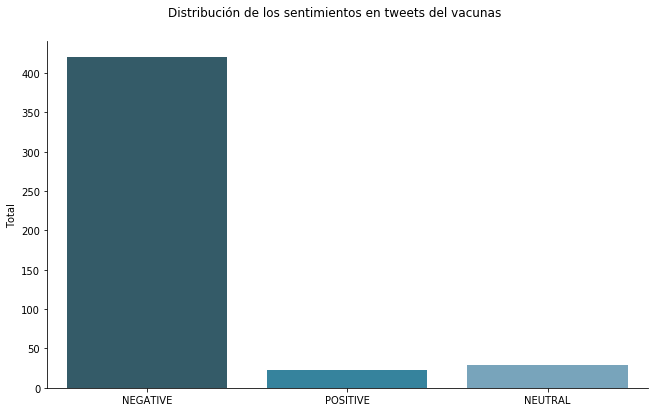

In [30]:
a=pd.DataFrame(SGDC.predict(vector_predict))
a=a.dropna()
a.columns=['polaridad']
print(a['polaridad'].value_counts())
sent=sns.catplot(x="polaridad", data=a, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
sent.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
sent.fig.suptitle('Distribución de los sentimientos en tweets del vacunas')
sent.set_axis_labels("", "Total")
plt.show();

In [31]:
#polaridad por ciudad
d=pd.concat([sinovac,a['polaridad']], axis=1)
d=d.dropna()
d[d['polaridad']=="NEUTRAL"]

,Unnamed: 0,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions,pp,polaridad
9,9.0,#HablemosDeVacunas @UniJaveriana Sinovac es un...,2021-06-03 16:45:14,Bogotá,"Medellín, Colombia","1,40049379123307E+018",https://twitter.com/i/web/stuatus/140049379123...,"Sinovac es una vacuna de Virus inactivado, s...","['https://t.co/WHQKeAZRba', 'https://t.co/1tTP...","['#HablemosDeVacunas', '#COVID19']","['@UniJaveriana', '@MinSaludCol']",virus inactivado segura efectiva plan luego co...,NEUTRAL
43,43.0,"@marcela_gallego Mis padres, tíos abuelos, sue...",2021-06-03 12:44:33,Bogotá,Bogota,"1,40043322084027E+018",https://twitter.com/i/web/stuatus/140043322084...,"Mis padres, tíos abuelos, suegra, esposa, ami...",[],[],['@marcela_gallego'],padres tíos abuelos suegra esposa amigos famil...,NEUTRAL
52,52.0,@sepega_ He tenido pacientes en consulta que m...,2021-06-03 03:51:51,Bogotá,"Medellín, Colombia","1,40029916506696E+018",https://twitter.com/i/web/stuatus/140029916506...,He tenido pacientes en consulta que me han co...,[],[],['@sepega_'],pacientes consulta contado cancelado citas vac...,NEUTRAL
89,89.0,Mi mamá (62 años) fue vacunada con Sinovac hac...,2021-06-02 18:06:26,Bogotá,"Bogotá, D.C., Colombia","1,40015183809634E+018",https://twitter.com/i/web/stuatus/140015183809...,Mi mamá (62 años) fue vacunada con Sinovac hac...,['https://t.co/G8KvC57sei'],[],[],mamá años vacunada hace mes semana pasada conf...,NEUTRAL
99,99.0,El Gobierno ecuatoriano confirmó que este juni...,2021-06-02 15:03:00,Bogotá,"Bogotá, DC, Colombia","1,40010567557379E+018",https://twitter.com/i/web/stuatus/140010567557...,El Gobierno ecuatoriano confirmó que este juni...,"['https://t.co/RL3J8sKlkA', 'https://t.co/r8mS...",[],[],gobierno ecuatoriano confirmó junio recibirá m...,NEUTRAL
116,116.0,#SaludYVida\n\nUna ciudad ubicada en Sao Paulo...,2021-06-02 12:53:46,Bogotá,"Bogotá, Colombia","1,40007315165715E+018",https://twitter.com/i/web/stuatus/140007315165...,"\n\nUna ciudad ubicada en Sao Paulo, Brasil, i...",['https://t.co/3OPPsrRhau'],['#SaludYVida'],[],ciudad ubicada sao paulo brasil inmunizó toda ...,NEUTRAL
178,178.0,@juansearroyo Arroyis la sinovac,2021-06-01 21:09:41,Bogotá,CALI-COLOMBIA,"1,39983556596146E+018",https://twitter.com/i/web/stuatus/139983556596...,Arroyis la sinovac,[],[],['@juansearroyo'],arroyis,NEUTRAL
192,192.0,@sergiobarbosach La sinovac servirá también pa...,2021-06-01 19:30:24,Bogotá,"Bogotá, D.C., Colombia","1,39981057956562E+018",https://twitter.com/i/web/stuatus/139981057956...,La sinovac servirá también para ese virus?,[],[],['@sergiobarbosach'],servirá virus,NEUTRAL
215,215.0,La OMS valida la vacuna de Sinovac contra la C...,2021-06-01 17:40:22,Bogotá,Colombia,"1,39978288926126E+018",https://twitter.com/i/web/stuatus/139978288926...,La OMS valida la vacuna de Sinovac contra la C...,['https://t.co/02bYk0fSYa'],[],[],oms valida uso emergencia,NEUTRAL
227,227.0,¿Qué pasó con una ciudad que vacunó a toda su ...,2021-06-01 16:54:56,Bogotá,Bogotá,"1,39977145832324E+018",https://twitter.com/i/web/stuatus/139977145832...,¿Qué pasó con una ciudad que vacunó a toda su ...,"['https://t.co/9duPsaDxll', 'https://t.co/SxJQ...",[],[],pasó ciudad vacunó toda población contamos acá,NEUTRAL


In [32]:
a=pd.crosstab(d.polaridad,d.city)
a

city,Bogotá
polaridad,
NEGATIVE,416
NEUTRAL,29
POSITIVE,23


## pfizer

In [34]:

pfizer=pd.read_csv('/home/denislopez/07-Euclea/Tweets_pfizer.csv')
len(pfizer)
#predict=sinovac['pp']
vector_predict=tfidf.transform(pfizer["pp"])
polaridad_predict=SGDC.predict(vector_predict)

NEGATIVE    819
POSITIVE     98
NEUTRAL      67
Name: polaridad, dtype: int64


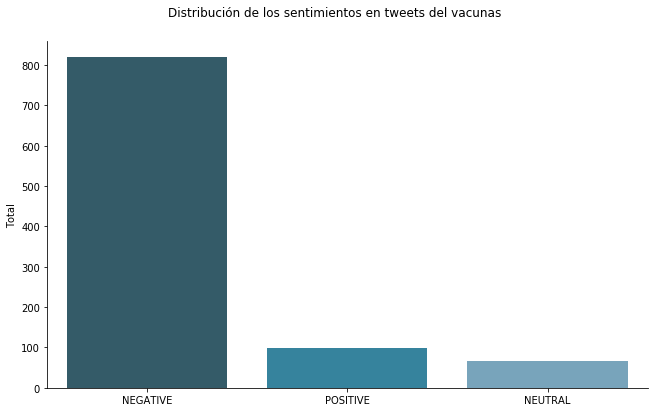

In [35]:
a=pd.DataFrame(SGDC.predict(vector_predict))
a=a.dropna()
a.columns=['polaridad']
print(a['polaridad'].value_counts())
sent=sns.catplot(x="polaridad", data=a, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
sent.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
sent.fig.suptitle('Distribución de los sentimientos en tweets del vacunas')
sent.set_axis_labels("", "Total")
plt.show();

In [36]:
a=pd.crosstab(d.polaridad,d.city)
a

city,Bogotá
polaridad,
NEGATIVE,416
NEUTRAL,29
POSITIVE,23
